In [14]:
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import Counter
import seaborn as sns
import ast 
import math

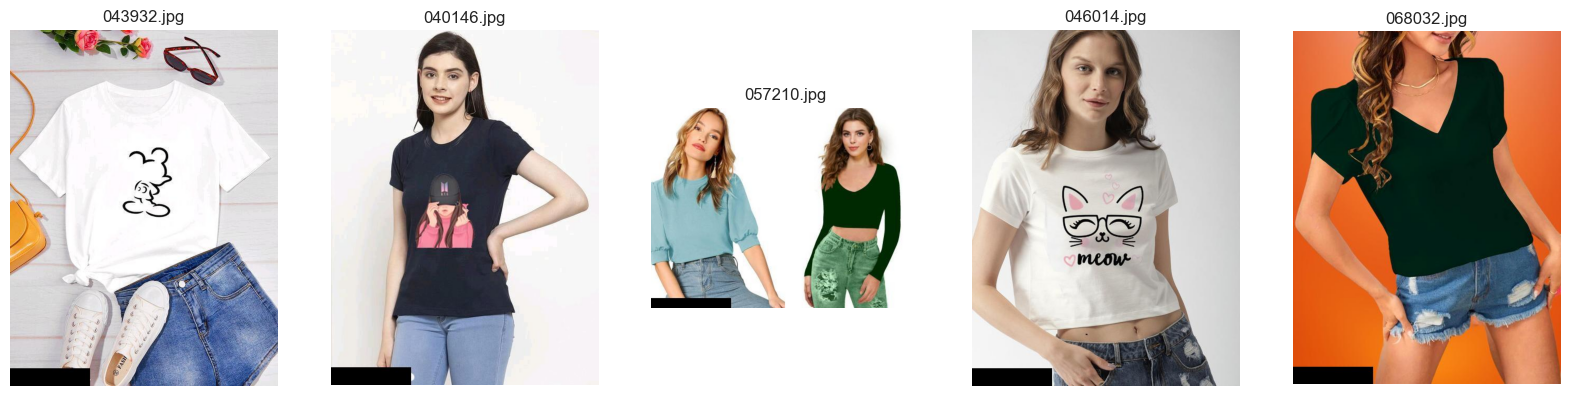

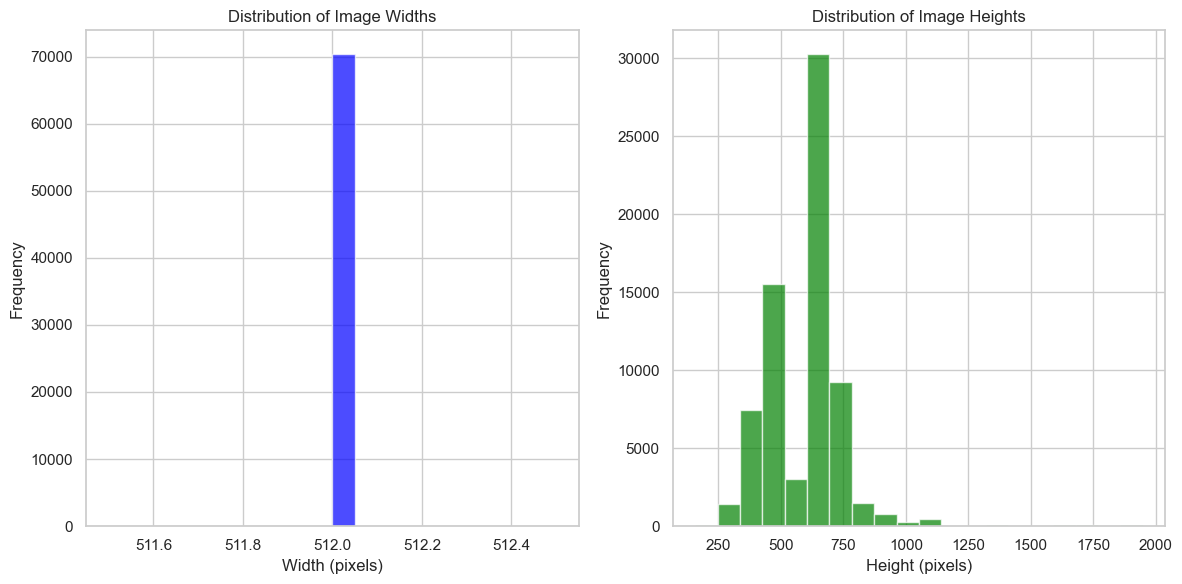

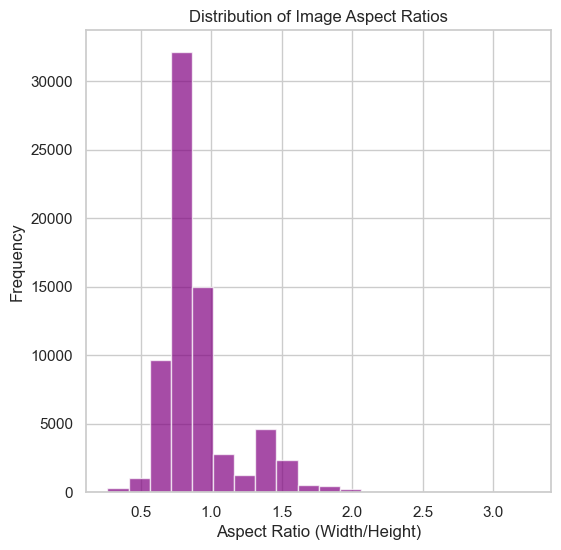

In [15]:
# Define the path to the folder containing images
image_folder_path = 'train_images'

# Get a list of all image file names in the folder
image_files = [f for f in os.listdir(image_folder_path) if f.endswith(('png', 'jpg', 'jpeg'))]

# Display some sample images
sample_images = random.sample(image_files, 5)
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, img_file in zip(axes, sample_images):
    img = Image.open(os.path.join(image_folder_path, img_file))
    ax.imshow(img)
    ax.set_title(img_file)
    ax.axis('off')
plt.show()

# Analyze the distribution of image sizes
image_sizes = []
for img_file in image_files:
    img = Image.open(os.path.join(image_folder_path, img_file))
    image_sizes.append(img.size)

# Convert to numpy array for easier analysis
image_sizes = np.array(image_sizes)
widths, heights = image_sizes[:, 0], image_sizes[:, 1]

# Plot the distribution of image widths and heights
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Analyze the distribution of image aspect ratios
aspect_ratios = widths / heights

plt.figure(figsize=(6, 6))
plt.hist(aspect_ratios, bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Image Aspect Ratios')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.show()

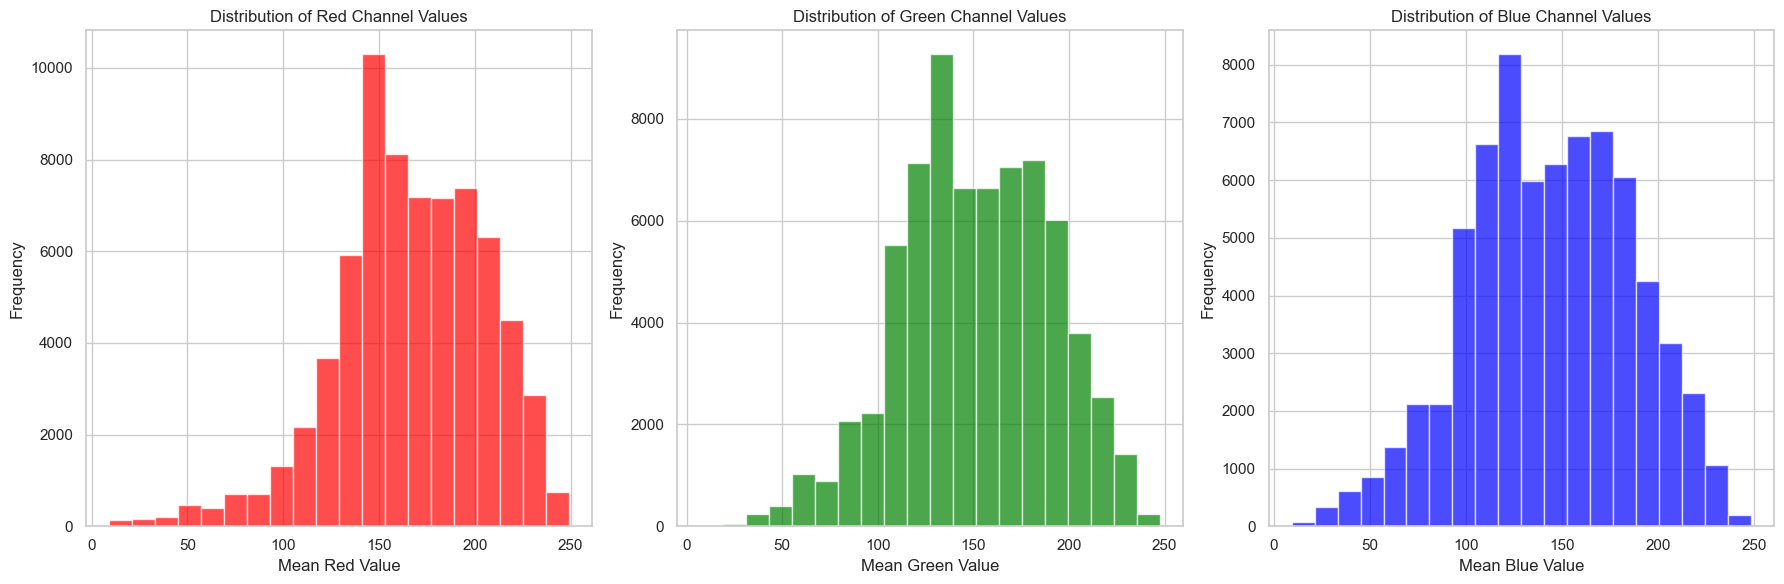

In [16]:
# Analyze the color distribution of the images
color_distributions = {'red': [], 'green': [], 'blue': []}

for img_file in image_files:
    img = Image.open(os.path.join(image_folder_path, img_file))
    img_array = np.array(img)
    
    # Calculate the mean color values for each channel
    mean_red = np.mean(img_array[:, :, 0])
    mean_green = np.mean(img_array[:, :, 1])
    mean_blue = np.mean(img_array[:, :, 2])
    
    color_distributions['red'].append(mean_red)
    color_distributions['green'].append(mean_green)
    color_distributions['blue'].append(mean_blue)

# Convert to numpy arrays for easier analysis
color_distributions['red'] = np.array(color_distributions['red'])
color_distributions['green'] = np.array(color_distributions['green'])
color_distributions['blue'] = np.array(color_distributions['blue'])

# Plot the distribution of color values
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(color_distributions['red'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of Red Channel Values')
plt.xlabel('Mean Red Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(color_distributions['green'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Green Channel Values')
plt.xlabel('Mean Green Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(color_distributions['blue'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Blue Channel Values')
plt.xlabel('Mean Blue Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\Sidhartha Garg\AppData\Local\Temp\ipykernel_35644\1012240364.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(color_distributions['red'], color='red', label='Red Channel', shade=True)
C:\Users\Sidhartha Garg\AppData\Local\Temp\ipykernel_35644\1012240364.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(color_distributions['green'], color='green', label='Green Channel', shade=True)
C:\Users\Sidhartha Garg\AppData\Local\Temp\ipykernel_35644\1012240364.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(color_distributions['blue'], color='blue', label='Blue Channel', shade=True)


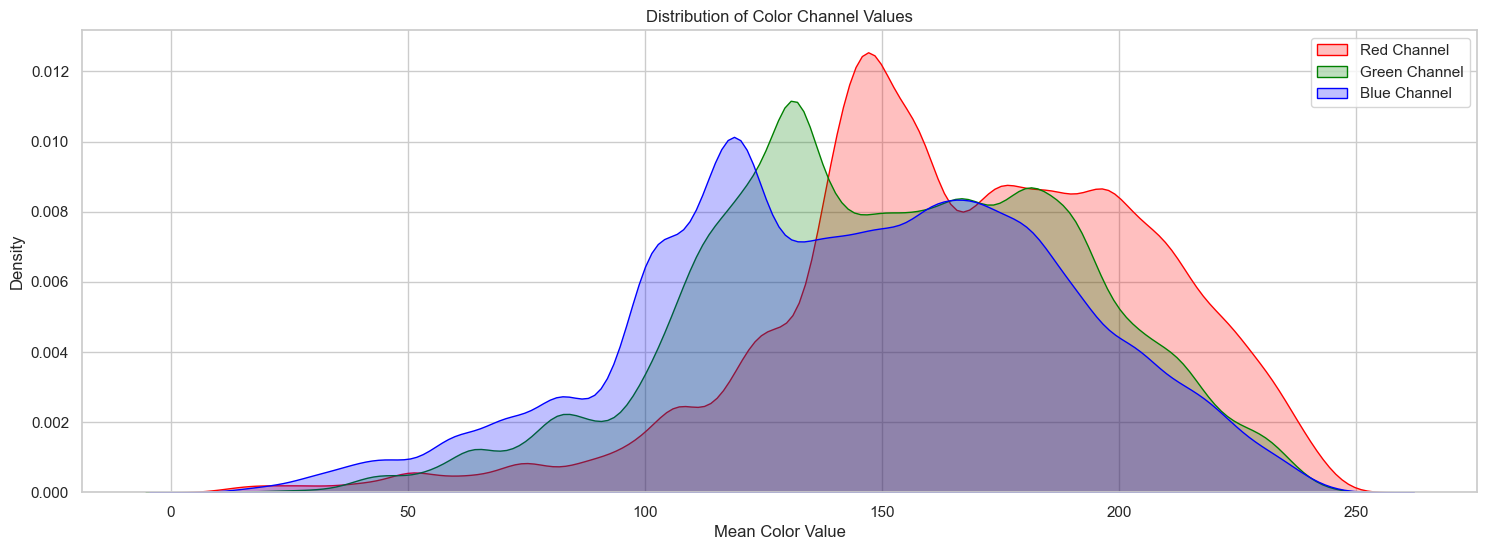

In [17]:
# maeke the color_distributions data in one plot
plt.figure(figsize=(18, 6))
sns.kdeplot(color_distributions['red'], color='red', label='Red Channel', shade=True)
sns.kdeplot(color_distributions['green'], color='green', label='Green Channel', shade=True)
sns.kdeplot(color_distributions['blue'], color='blue', label='Blue Channel', shade=True)
plt.title('Distribution of Color Channel Values')
plt.xlabel('Mean Color Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [18]:
import cv2
def variance_of_laplacian(image):
    # Compute the Laplacian of the image and return the variance
    return cv2.Laplacian(image, cv2.CV_64F).var()

# Perform blur detection on all images
blur_scores = []
for img_file in image_files:
    img = Image.open(os.path.join(image_folder_path, img_file))
    img_gray = np.array(img.convert('L'))  # Convert image to grayscale
    blur_score = variance_of_laplacian(img_gray)
    blur_scores.append(blur_score)



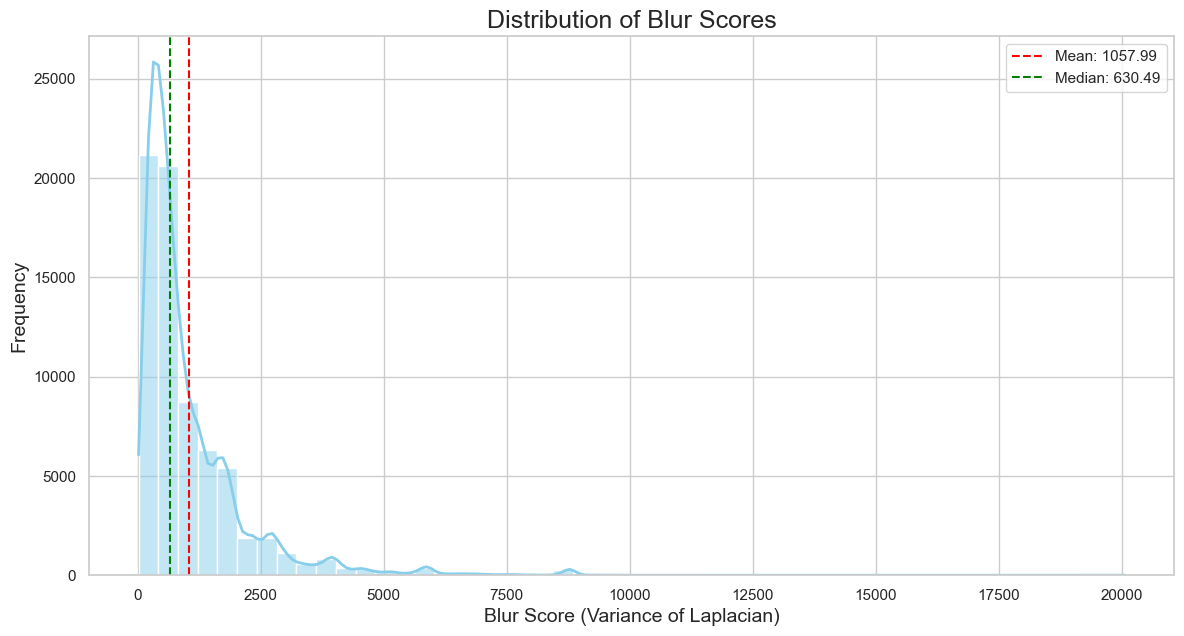

Mean Blur Score: 1054.3525266704557
Median Blur Score: 663.5131448610829
Standard Deviation of Blur Scores: 1145.874938544418
Number of Blurry Images (Blur Score < 100): 474
Blurry Images:


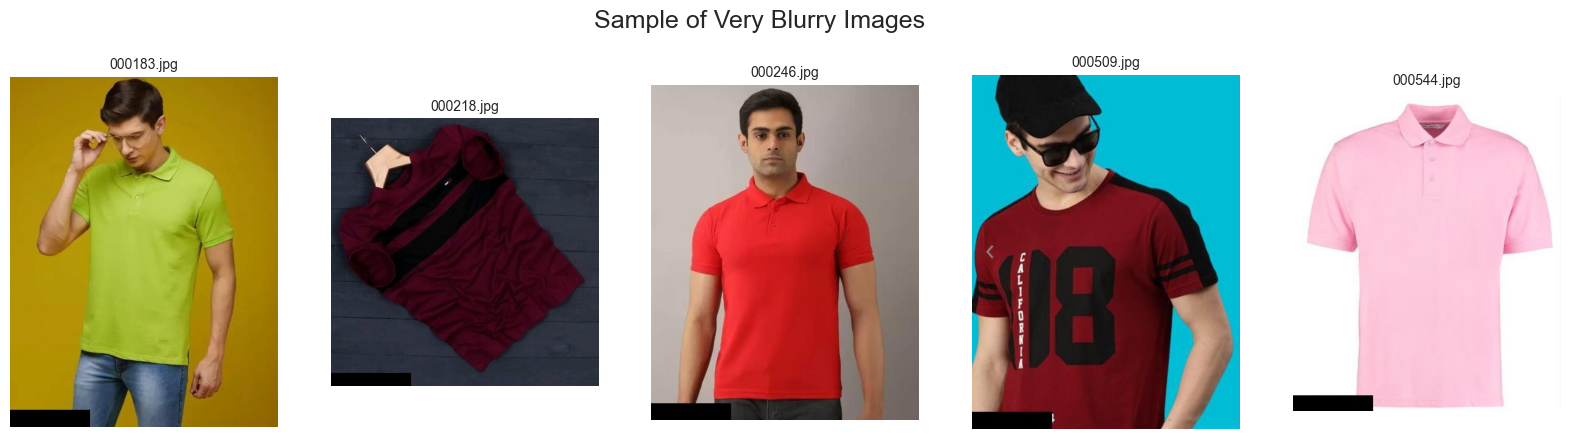

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

# Convert blur scores to numpy array for easier analysis
blur_scores = np.array(blur_scores)

# Set Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", as_cmap=True)

# Plot the distribution of blur scores with density plot overlay
plt.figure(figsize=(14, 7))
sns.histplot(blur_scores, bins=50, kde=True, color="skyblue", line_kws={'linewidth': 2})
plt.title("Distribution of Blur Scores", fontsize=18)
plt.xlabel("Blur Score (Variance of Laplacian)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(np.mean(blur_scores), color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_blur_score:.2f}')
plt.axvline(np.median(blur_scores), color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_blur_score:.2f}')
plt.legend()
plt.show()

# Display summary statistics
mean_blur_score = np.mean(blur_scores)
median_blur_score = np.median(blur_scores)
std_blur_score = np.std(blur_scores)

print(f"\033[1mMean Blur Score:\033[0m {mean_blur_score}")
print(f"\033[1mMedian Blur Score:\033[0m {median_blur_score}")
print(f"\033[1mStandard Deviation of Blur Scores:\033[0m {std_blur_score}")

# Print the number of images that are very blurry
threshold = 100
num_blurry_images = np.sum(blur_scores < threshold)
print(f"\033[1mNumber of Blurry Images (Blur Score < {threshold}):\033[0m {num_blurry_images}")

# Show the very blurry images
blurry_images = [img_file for img_file, score in zip(image_files, blur_scores) if score < threshold]
print("Blurry Images:")

# Display a sample of blurry images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Sample of Very Blurry Images", fontsize=18)
for ax, img_file in zip(axes, blurry_images[:5]):
    img = Image.open(os.path.join(image_folder_path, img_file))
    ax.imshow(img)
    ax.set_title(img_file, fontsize=10)
    ax.axis("off")
plt.show()


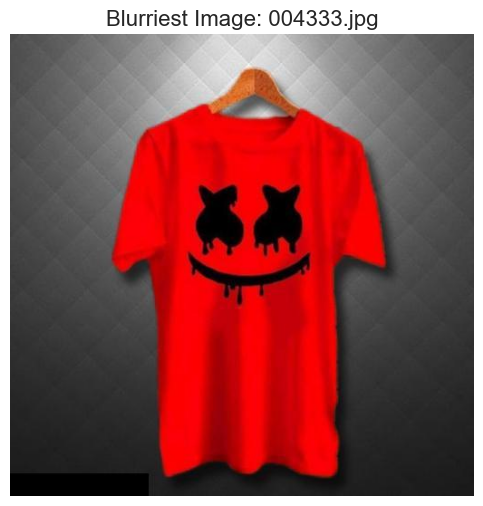

In [20]:
#show the blurriest image
blurriest_image = image_files[np.argmin(blur_scores)]
img = Image.open(os.path.join(image_folder_path, blurriest_image))
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Blurriest Image: {blurriest_image}", fontsize=16)
plt.axis('off')
plt.show()
